In [1]:
import numpy as np

import matplotlib.pyplot as plt
import rcparams
plt.rcParams.update(rcparams.params)

import matplotlib.colors
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection

from cmcrameri import cm

import gwsurrogate as gws

/home/efinch/miniconda3/envs/ringdown/lib/python3.8/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home/efinch/miniconda3/envs/ringdown/lib/python3.8/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [2]:
# Load the surrogate
sur = gws.LoadSurrogate('NRSur7dq4')

Loaded NRSur7dq4 model


In [3]:
# Evaluate the surrogate 
times, h, dyn = sur(
    q=1.2, chiA0=[0,0,0.3], chiB0=[0,0,-0.4], f_low=0, dt=0.1, inclination=0)

# Just look at the plus polarization
h_plus = np.real(h)

# Cross polarization in background?
h_cross = -np.imag(h)

In [4]:
# Split the line up into sections depending on how we want to colour it
# ============================================================================
inspiral_mask = times <= -25
inspiral = h_plus[inspiral_mask]

inspiral_merger_mask = (times >= -26) & (times <= -9)
inspiral_merger = h_plus[inspiral_merger_mask]
i_m_times = times[inspiral_merger_mask]

merger_mask = (times >= -10) & (times <= 10)
merger = h_plus[merger_mask]

merger_ringdown_mask = (times >= 9) & (times <= 20)
merger_ringdown = h_plus[merger_ringdown_mask]
m_r_times = times[merger_ringdown_mask]

ringdown_mask = times >= 19
ringdown = h_plus[ringdown_mask]

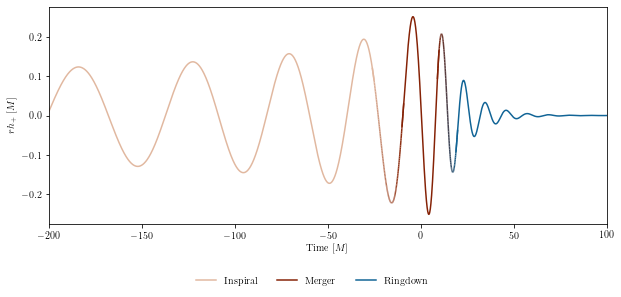

In [7]:
fig, ax = plt.subplots(figsize=(10,4))

# ax.plot(times, h_cross, c='k', alpha=0.1)

# We need the RBG colours for the colour map
cmap = cm.vik
# inspiral_colour = cmap(0.2)[:-1] # matplotlib.colors.to_rgb('C0')
# merger_colour = cmap(0.5)[:-1] # matplotlib.colors.to_rgb('C1')
# ringdown_colour = cmap(0.8)[:-1] # matplotlib.colors.to_rgb('C2')
inspiral_colour = cmap(0.6)[:-1] # matplotlib.colors.to_rgb('C0')
merger_colour = cmap(0.9)[:-1] # matplotlib.colors.to_rgb('C1')
ringdown_colour = cmap(0.2)[:-1] # matplotlib.colors.to_rgb('C2')
# inspiral_colour = (0.005193, 0.098238, 0.349842)
# merger_colour = (0.339469, 0.461685, 0.279468)
# ringdown_colour = (0.983574, 0.64959, 0.538819)

# The solid colour regions
ax.plot(times[inspiral_mask], inspiral, c=inspiral_colour)
ax.plot(times[merger_mask], merger, c=merger_colour)
ax.plot(times[ringdown_mask], ringdown, c=ringdown_colour)

# Colour maps
# ===========

# Create colour maps from list
i_m_colours = [inspiral_colour, merger_colour]
i_m_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", i_m_colours)

m_r_colours = [merger_colour, ringdown_colour]
m_r_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", m_r_colours)

# Line segments
# =============

# Create a set of line segments so that we can color them individually
i_m_points = np.array([i_m_times, inspiral_merger]).T.reshape(-1, 1, 2)
i_m_segments = np.concatenate([i_m_points[:-1], i_m_points[1:]], axis=1)

m_r_points = np.array([m_r_times, merger_ringdown]).T.reshape(-1, 1, 2)
m_r_segments = np.concatenate([m_r_points[:-1], m_r_points[1:]], axis=1)

# Create a continuous norm to map from data points to colours
i_m_norm = plt.Normalize(i_m_times[0], i_m_times[-1])
i_m_lc = LineCollection(i_m_segments, cmap=i_m_cmap, norm=i_m_norm)

m_r_norm = plt.Normalize(m_r_times[0], m_r_times[-1])
m_r_lc = LineCollection(m_r_segments, cmap=m_r_cmap, norm=m_r_norm)

# Set the values used for colormapping
i_m_lc.set_array(i_m_times)
m_r_lc.set_array(m_r_times)

# Add lines to the figure
i_m_line = ax.add_collection(i_m_lc)
m_r_line = ax.add_collection(m_r_lc)

ax.set_xlabel('Time $[M]$')
ax.set_xlim(-200, times[-1])

ax.set_ylabel('$rh_+\ [M]$')

custom_lines = [Line2D([0], [0], color=c) for c in [inspiral_colour, merger_colour, ringdown_colour]]
fig.legend(
    custom_lines, 
    ['Inspiral', 'Merger', 'Ringdown'], 
    frameon=False, ncol=3, loc='lower center', bbox_to_anchor=(0.49,-0.12))

fig.savefig('td_waveform.pdf', bbox_inches='tight')